Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

In [73]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.5 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.2 MB/s eta 0:00:00ta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4a680c4389cb10de6ab0d4e5f6bd9b89ddf85c066975629b66b4c8bf89bbdbbb
  Stored in directory: /home/jovyan/.cache/pip/wheels/ea/1c/a8/5cec3479cd45136a7111e2d96aac299b219b199c411665250b
Successfully built htmlmin


In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='winequality.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot: >

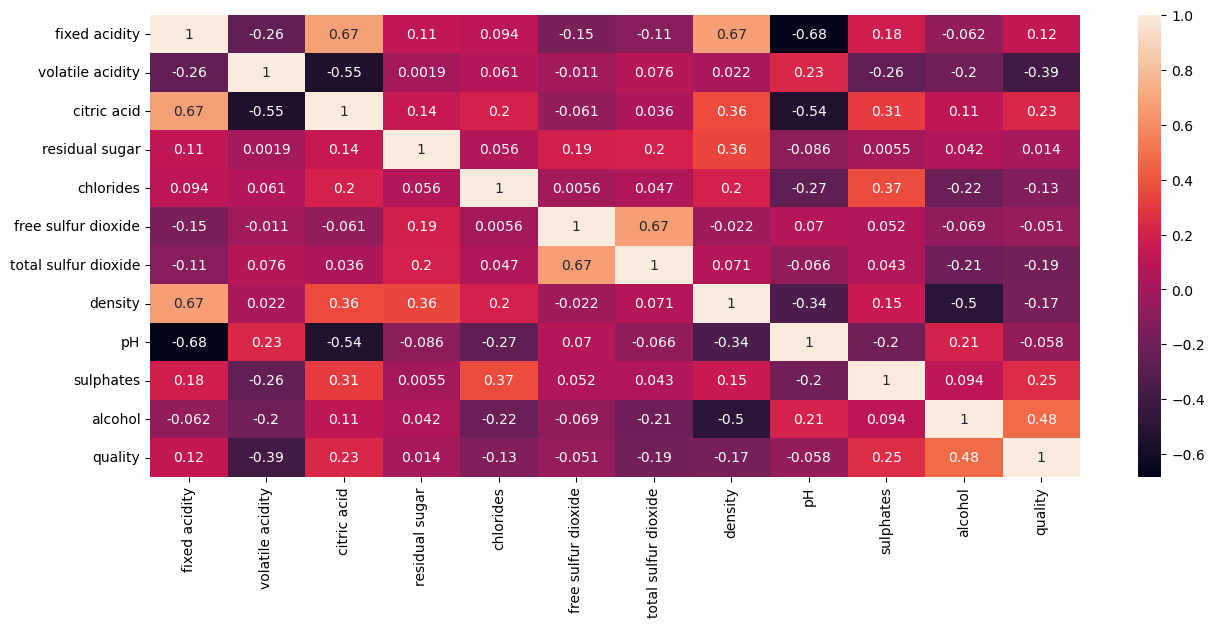

In [5]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), annot=True)

## observation 

- for quality of wine, alcohol plays a vital role because it has the highest correlation(i.e. 0.48)
- apart from alcohol, suplhates(0.25), citrid acid(0.23) and fixed acidity(0.12) stand at 2nd, 3rd and 4th positions to determine the quality of the wine.
- the higher the amount of volatile acidity, the worst the quality of wine is as it is inversely proportion to the quality of wine.


### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In the above given wine quality share by the company there are not missing values. However, there are several common techniques that can be used to handle missing data in a dataset, including:

Listwise deletion: This involves deleting all observations with missing values. The advantage of this technique is that it is simple and can be effective if the amount of missing data is small. However, it can result in a loss of information if a large proportion of the data is missing.

Mean imputation: This involves replacing missing values with the mean value of the non-missing values for that variable. The advantage of this technique is that it is simple and can be effective if the missing data is random and the variable is normally distributed. However, it can lead to biased estimates if the missing data is not random or if the variable has a non-normal distribution.

Regression imputation: This involves using regression analysis to estimate missing values based on the relationship between the variable with missing data and other variables in the dataset. The advantage of this technique is that it can be effective if there are strong relationships between the variables in the dataset. However, it can be computationally intensive and may require a large amount of data.

Multiple imputation: This involves creating multiple imputed datasets using a statistical algorithm and combining the results to produce a final estimate. The advantage of this technique is that it can be effective for handling missing data in complex datasets. However, it can be computationally intensive and may require specialized software.

K-nearest neighbor imputation:
K-nearest neighbor imputation involves replacing missing values with values from the K most similar cases in the dataset. This technique is more sophisticated than mean or median imputation and may produce more accurate estimates. K-nearest neighbor imputation also preserves the distribution of the variable and does not reduce the variance. However, k-nearest neighbor imputation may not be feasible if there are many missing values or if there are no similar cases in the dataset. The performance of this technique also depends on the choice of the K value.



### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [14]:
stud = pd.read_csv('exams.csv')

<AxesSubplot: >

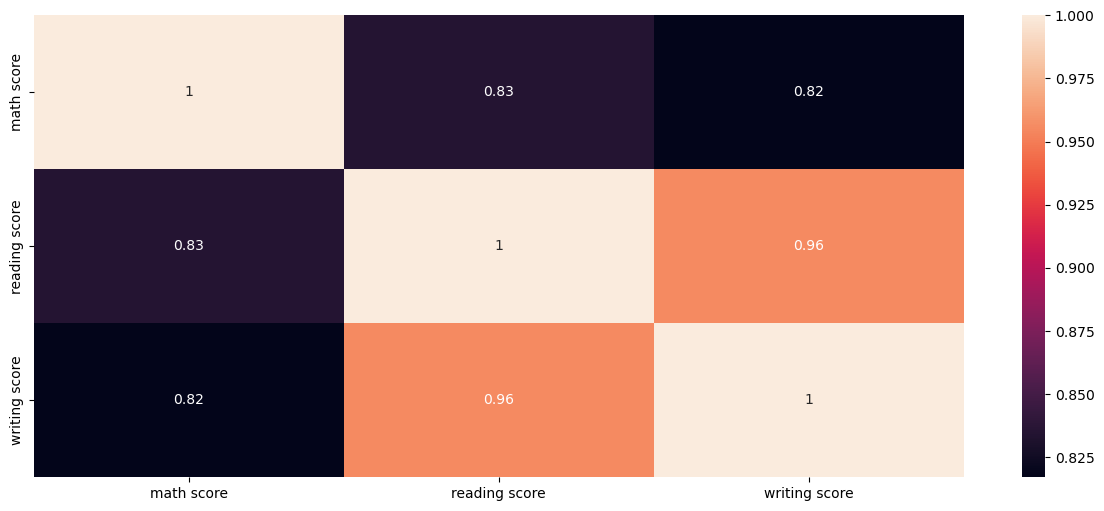

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(stud.corr(), annot=True)

In [16]:
stud.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,master's degree,free/reduced,none,70,78,80
1,male,group B,high school,standard,none,66,60,57
2,male,group D,bachelor's degree,standard,none,71,68,67
3,female,group C,some high school,standard,none,73,89,90
4,male,group C,master's degree,standard,none,50,48,37


In [17]:
from pandas_profiling import ProfileReport
prof = ProfileReport(stud)
prof.to_file(output_file='student_performance.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### observation 

- there are 4 input variables namely lunch, test preparation, gender and parental education which effect student performance.
- using Profile Report of pandas profiling we can find the correlation between the output variables(student performance) and input variable

### results

- lunch is the most imp. feature that affect students' performance in exams followed by test preparation, gender and parental education. 

In [18]:
stud.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
stud.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [50]:
stud.describe()

,mean
count,996.000000
mean,67.785810
std,14.798904
min,21.666667
25%,57.000000
50%,68.666667
75%,78.666667
max,100.000000


In [62]:
## taking mean of every candidate and eliminating math score reading score and writing score

stud

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean
0,female,group D,master's degree,free/reduced,none,76.000000
1,male,group B,high school,standard,none,61.000000
2,male,group D,bachelor's degree,standard,none,68.666667
3,female,group C,some high school,standard,none,84.000000
4,male,group C,master's degree,standard,none,45.000000
...,...,...,...,...,...,...
995,female,group D,associate's degree,standard,none,65.333333
996,female,group D,some high school,standard,none,75.000000
997,female,group D,some college,standard,none,78.666667
998,female,group C,high school,standard,none,50.666667


<AxesSubplot: xlabel='lunch', ylabel='mean'>

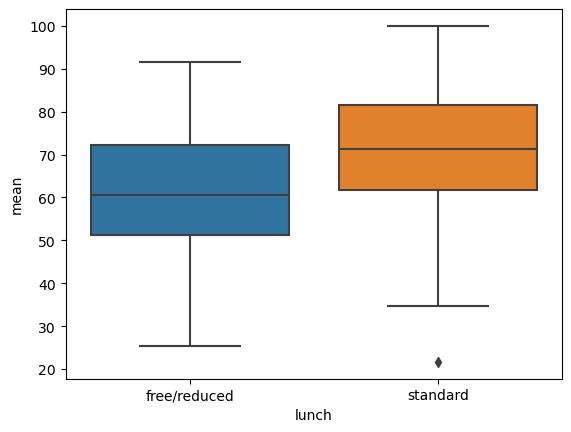

In [26]:
sns.boxplot(x='lunch', y='mean', data=stud)

<AxesSubplot: xlabel='test preparation course', ylabel='mean'>

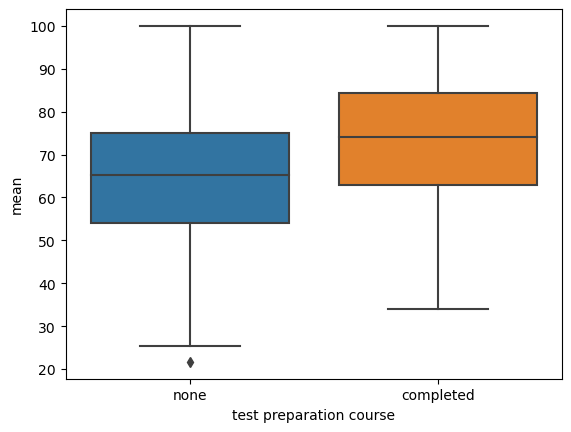

In [27]:
sns.boxplot(x='test preparation course', y='mean', data=stud)

<AxesSubplot: xlabel='gender', ylabel='mean'>

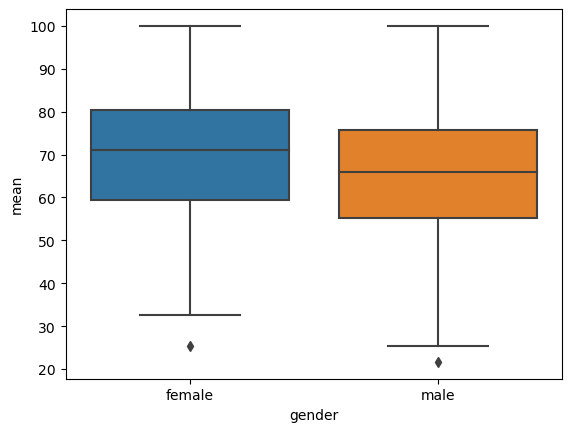

In [29]:
sns.boxplot(x='gender', y='mean', data=stud)

### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?


In [60]:
student_performance = pd.read_csv('stud.csv')
student_performance

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


- In the context of the student performance dataset, feature engineering involves identifying the most relevant variables that influence student performance and transforming these variables into a format that is suitable for machine learning algorithms.

- in the above dataset lunch and test preperartion is the most imp. variables for getting hihg score in math, reading and writing. 

- To select and transform the variables for our model, we first examined the dataset to identify the most relevant variables. We then performed a series of transformations on the data to create new features and ensure that the data was suitable for machine learning algorithms.

- steps to transform the columns which is suitable for machine learning algorithms are: - 

1. data cleaning 

2. feature scaling 

3. OHE

4. feature engineering

### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [63]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


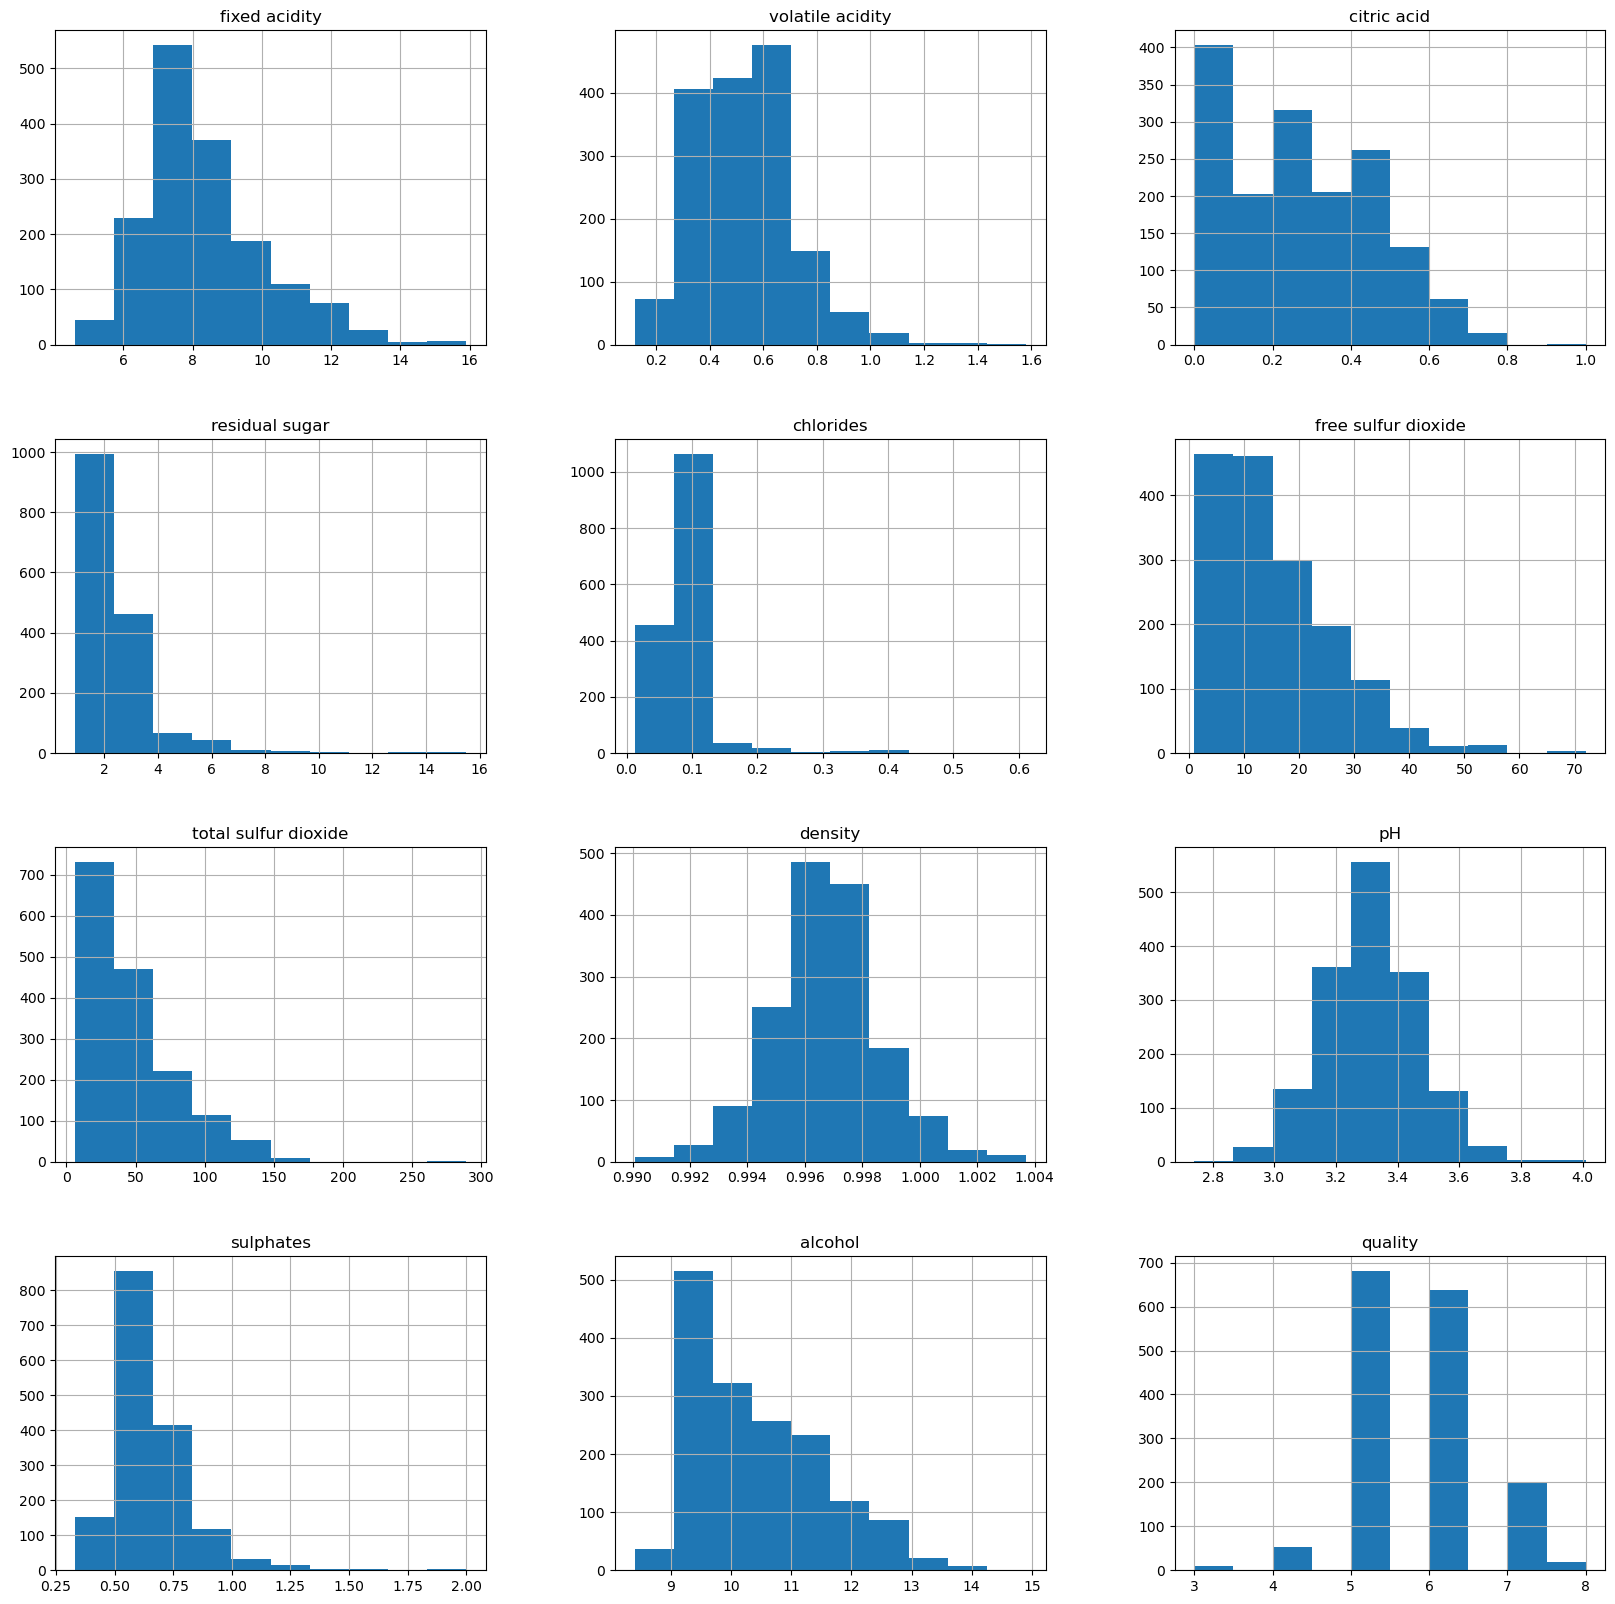

In [70]:
data.hist(figsize=(20,20))
plt.show()

### Observations 

From the histograms, we can see that some features exhibit non-normality, including:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- free sulfur dioxide
- total sulfur dioxide
- alcohol


To improve normality, we could apply various transformations to these variables, such as:

Log transformation: This transformation can be used to reduce the effect of extreme values and make the distribution more symmetric. This can be applied to features with right-skewed distributions.

Box-Cox transformation: This transformation can be used to find the optimal power transformation that maximizes normality.

Square root transformation: This transformation can be used to reduce the skewness of the distribution. This can be applied to features with highly skewed distributions, such as volatile acidity and citric acid.

### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [72]:
data = pd.read_csv('winequality-red.csv')
data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
167,7.3,0.550,0.03,1.6,0.072,17.0,42.0,0.99560,3.37,0.48,9.0,4
1214,10.2,0.330,0.46,1.9,0.081,6.0,9.0,0.99628,3.10,0.48,10.4,6
866,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2,4
654,8.6,0.470,0.47,2.4,0.074,7.0,29.0,0.99790,3.08,0.46,9.5,5
452,6.8,0.560,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0,6
125,9.0,0.620,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5
545,9.1,0.470,0.49,2.6,0.094,38.0,106.0,0.99820,3.08,0.59,9.1,5
397,11.5,0.590,0.59,2.6,0.087,13.0,49.0,0.99880,3.18,0.65,11.0,6
944,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.1,7


In [89]:
from sklearn.decomposition import PCA
import pandas as pd

### separate input and output variable
X = data.drop('quality', axis=1)
y= data['quality']

X_std = (X-X.mean())/X.std()

### PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

X_pca

array([[-1.61902338,  0.45080906, -1.7738992 ],
       [-0.79892   ,  1.85597243, -0.91140504],
       [-0.74824501,  0.88176301, -1.17102788],
       ...,
       [-1.45567358,  0.3116481 ,  1.12388781],
       [-2.26980784,  0.97948469,  0.62776817],
       [-0.42684122, -0.53652236,  1.62844575]])

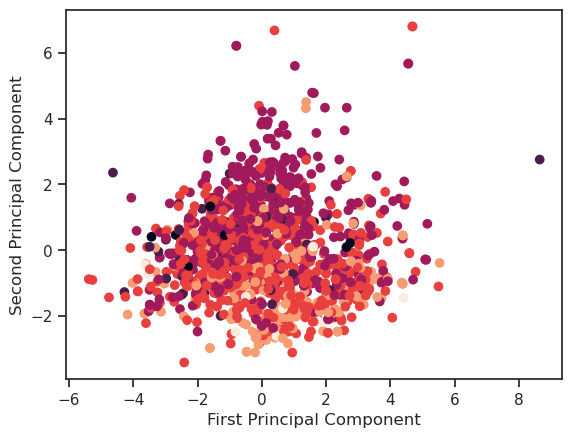

In [90]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [92]:
explained_variance = pca.explained_variance_ratio_
explained_variance*100

array([28.17393128, 17.50826991, 14.0958499 ])

### Observation 

- we have taken 3 level of variance. 
- From the explained variance ratios, we can see that the first principal component explains the highest amount of variance (28.2%), followed by the second and third principal components (17.5% and 14.1%, respectively).

In [93]:
cumulative_var_ratio = np.cumsum(explained_variance)

# Find the minimum number of principal components required to explain 90% of the variance
n_components = np.argmax(cumulative_var_ratio >= 0.9) + 1

print(f"The minimum number of principal components required to explain 90% of the variance is {n_components}.")

The minimum number of principal components required to explain 90% of the variance is 1.
